In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
from matplotlib import pyplot as plt
from astropy.io import fits
import seaborn as sns

In [2]:
#Reading the Velocity FITS file
virgo=fits.open("C:/Users/SSA/Desktop/Jesto Research/VIRGO SOHO/Virgo Data (2023-SOHO)/VIRGO-SPM-BLUE-L2-MISSIONLONG.fits")
virgo.info()

Filename: C:/Users/SSA/Desktop/Jesto Research/VIRGO SOHO/Virgo Data (2023-SOHO)/VIRGO-SPM-BLUE-L2-MISSIONLONG.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      35   (2, 14342400)   float64   


In [3]:
virgo[0].header 

SIMPLE  =                    T / Written by IDL:  Wed May 24 12:35:10 2023      
BITPIX  =                  -64 / Real*8 (double precision)                      
NAXIS   =                    2 /                                                
NAXIS1  =                    2 /                                                
NAXIS2  =             14342400 /                                                
DATE    = '2023-05-24'         /                                                
ORIGIN  = 'IAC/VIRGO Data Center (VDC)' /                                       
TELESCOP= 'SOHO    '           /                                                
INSTRUME= 'VIRGO   '           /                                                
DETECTOR= 'SPM     '           /                                                
BUNIT   = 'ppm     '           / Parts per million                              
CHANNEL = 'BLUE : Wavelenght=402nm, Widht=5nm' /                                
DATE-OBS= '1996-01-23T00:00:

In [4]:
#Data collected from Jan 23rd 1996 to April 30 2023
#The dataset
e=pd.DataFrame(virgo[0].data)
e

,0,1
0,4.460000e+00,NaN
1,6.446000e+01,NaN
2,1.244600e+02,NaN
3,1.844600e+02,-86.201175
4,2.444600e+02,-103.148127
...,...,...
14342395,8.605437e+08,NaN
14342396,8.605438e+08,NaN
14342397,8.605439e+08,NaN
14342398,8.605439e+08,NaN


In [5]:
#We will consier the data from 01-04-1996 to 30-04-2023
#The first 97920 observation should be discarded to do this.
e=pd.DataFrame(virgo[0].data)
e=e.iloc[97920:]

e=e.reset_index()
e=e.rename(columns={0:"Time",1:"Blue Ray"})
e

,index,Time,Blue Ray
0,97920,5.875234e+06,-43.032594
1,97921,5.875294e+06,-66.628304
2,97922,5.875354e+06,-60.489724
3,97923,5.875414e+06,-42.880244
4,97924,5.875474e+06,-41.797953
...,...,...,...
14244475,14342395,8.605437e+08,NaN
14244476,14342396,8.605438e+08,NaN
14244477,14342397,8.605439e+08,NaN
14244478,14342398,8.605439e+08,NaN


In [6]:
#checking for null values
e.isna().sum()

index             0
Time              0
Blue Ray    1364966
dtype: int64

In [7]:
#replacing null values with 0
e=e.fillna(0)
e
#converting to absolute values
e=abs(e)
e=pd.DataFrame(e["Blue Ray"])
e

,Blue Ray
0,43.032594
1,66.628304
2,60.489724
3,42.880244
4,41.797953
...,...
14244475,0.000000
14244476,0.000000
14244477,0.000000
14244478,0.000000


In [8]:
#Converting minutes to Days

virgo_daily=e.groupby(np.arange(len(e))//1440).mean()#since cadence is 60 sec

#Setting Date column
#We will consier the data from 01-04-1996 to 30-04-2023
virgo_daily["Date"]=pd.DataFrame(pd.date_range(start='1996-04-01', end='2023-05-1'))[0]

virgo_daily['Day'] = pd.DatetimeIndex(virgo_daily['Date']).day
virgo_daily['Month'] = pd.DatetimeIndex(virgo_daily['Date']).month
virgo_daily['Year'] = pd.DatetimeIndex(virgo_daily['Date']).year

virgo_daily



,Blue Ray,Date,Day,Month,Year
0,87.791061,1996-04-01,1,4,1996
1,97.360182,1996-04-02,2,4,1996
2,109.060382,1996-04-03,3,4,1996
3,90.083486,1996-04-04,4,4,1996
4,94.263864,1996-04-05,5,4,1996
...,...,...,...,...,...
9887,123.031219,2023-04-27,27,4,2023
9888,450.446498,2023-04-28,28,4,2023
9889,610.365415,2023-04-29,29,4,2023
9890,680.545638,2023-04-30,30,4,2023


## VIRGO DAILY OSCILLATIONS

C:\Users\SSA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Blue Ray'>

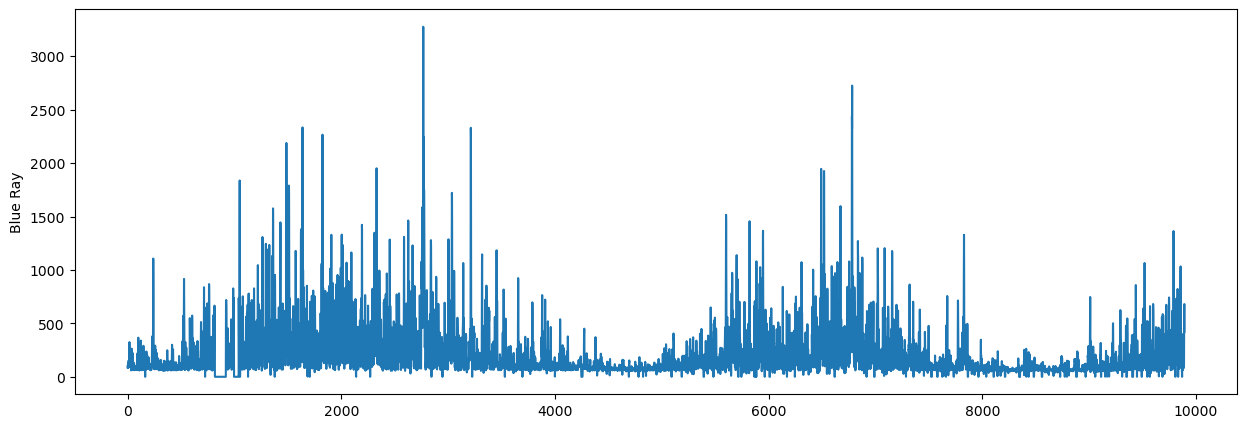

In [9]:
#Plotting the VIRGO DAILY OSCILLATIONS
plt.rcParams['figure.figsize'] = [15,5]
sns.lineplot(range(0,9892),virgo_daily["Blue Ray"])
#sns.scatterplot(x=[2045],y=[virgo_daily.iloc[2045]["Blue Ray"]],color='red')
#plt.xlim(2000,2100)

## VIRGO MONTHLY DATA

In [10]:
#Converting to monthly data

virgo_month=pd.DataFrame(virgo_daily.groupby(["Year","Month"])["Blue Ray"].mean())
virgo_month

virgo_month.to_csv("virgo_month.csv")
virgo_month=pd.read_csv("virgo_month.csv")

virgo_month["year_month"]=virgo_month["Year"].astype(str) +"-"+virgo_month["Month"].astype(str)
virgo_month

,Year,Month,Blue Ray,year_month
0,1996,4,138.414055,1996-4
1,1996,5,105.463569,1996-5
2,1996,6,83.106287,1996-6
3,1996,7,120.355216,1996-7
4,1996,8,131.475145,1996-8
...,...,...,...,...
321,2023,1,440.984180,2023-1
322,2023,2,314.538620,2023-2
323,2023,3,320.535963,2023-3
324,2023,4,180.907492,2023-4


In [11]:
virgo_month[virgo_month["year_month"]=="2014-4"].index.values


array([216], dtype=int64)

<AxesSubplot:title={'center':'MONTHLY SMOOTHED - Blue Ray Velocity vs Sunspot Numbers'}, xlabel='year_month'>

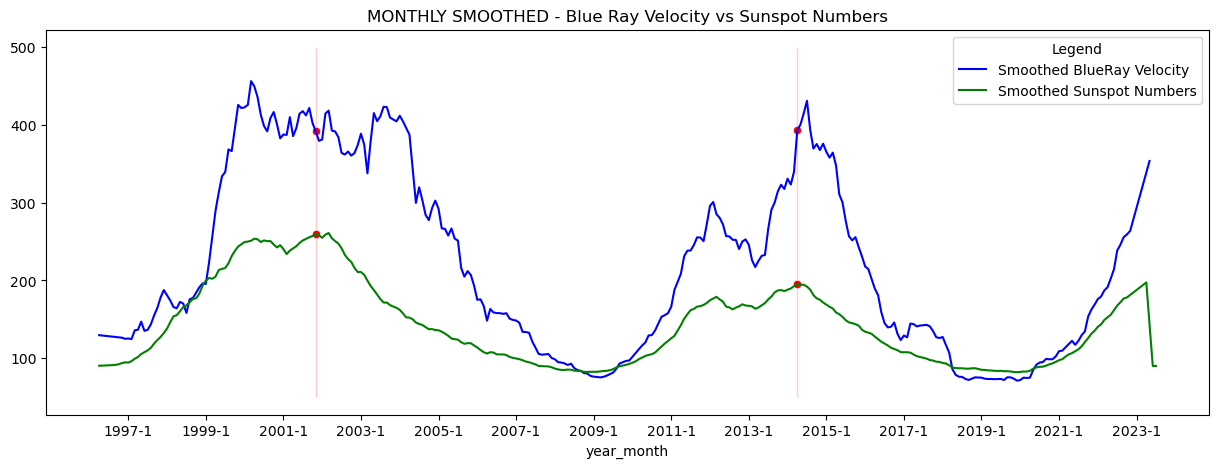

In [140]:
#Plotting the VIRGO MONTHLY OSCILLATIONS of 23rd and first half of 24th cycle
from matplotlib import pyplot as plt
from scipy import signal

plt.rcParams['figure.figsize'] = [15,5]
#ax=sns.lineplot(x=virgo_month["year_month"],y=virgo_month["Blue Ray"]).set(xticks=range(9,325,24))

#solar maximum for cycle 23 was on 2001-11 and 24th was on 2014-4
#sns.scatterplot(x=[virgo_month.iloc[67]["year_month"]],y=virgo_month.iloc[67]["Blue Ray"],color='red')#23rd cycle max
#sns.scatterplot(x=[virgo_month.iloc[216]["year_month"]],y=virgo_month.iloc[216]["Blue Ray"],color='red')#24th cycle max
#plt.ylim(50,80)
#plt.xlim(0,150) #setting the graph for 23rd cycle (till 2008)


sun_month1=pd.read_csv("sun_month.csv")

sun_month1["year_month"]=sun_month1["Year"].astype(str) +"-"+sun_month1["Month"].astype(str)
sun_month1=sun_month1.iloc[2136:]
sun_month1

#Sunspot Numbers
#sns.lineplot(x=(sun_month1["year_month"]),y=(sun_month1["sunspots"]+80),color='red')

#Smoothed Blue Ray Velocity
yhat_1 = signal.savgol_filter(virgo_month["Blue Ray"], 13,1)
g1=sns.lineplot(x=virgo_month["year_month"],y=yhat_1,color='blue').set(xticks=range(9,325,24))

#Smoothed Sunspot Numbers
yhat_ = signal.savgol_filter(sun_month1["sunspots"], 13, 1)
g1=sns.lineplot(x=sun_month1["year_month"],y=yhat_+80, color='green')

plt.legend(title='Legend', loc='upper right', labels=['Smoothed BlueRay Velocity', 'Smoothed Sunspot Numbers'])
plt.title("MONTHLY SMOOTHED - Blue Ray Velocity vs Sunspot Numbers")


#SOLAR MAXIMUMS FOR 23 AND 24 CYCLE
sns.scatterplot(x=[virgo_month["year_month"].iloc[67]],y=[pd.DataFrame(yhat_1)[0].iloc[67]],color='red')#solar 23 max
sns.scatterplot(x=[virgo_month["year_month"].iloc[216]],y=[pd.DataFrame(yhat_1)[0].iloc[216]],color='red')#solar 24 max

sns.scatterplot(x=[sun_month1["year_month"].iloc[69]],y=[pd.DataFrame(yhat_)[0].iloc[69]+80],color='red')#solar 23 max
sns.scatterplot(x=[sun_month1["year_month"].iloc[218]],y=[pd.DataFrame(yhat_)[0].iloc[218]+80],color='red')#solar 24 max

sns.lineplot(x=list(itertools.repeat(sun_month1["year_month"].iloc[69], 2)),y=[50,500],color='red')
sns.lineplot(x=list(itertools.repeat(sun_month1["year_month"].iloc[218], 2)),y=[50,500],color='red')


In [115]:
virgo_month["year_month"].iloc[216]

'2014-4'

<AxesSubplot:title={'center':'LOG MONTHLY SMOOTHED - Blue Ray Velocity vs Sunspot Numbers'}, xlabel='year_month'>

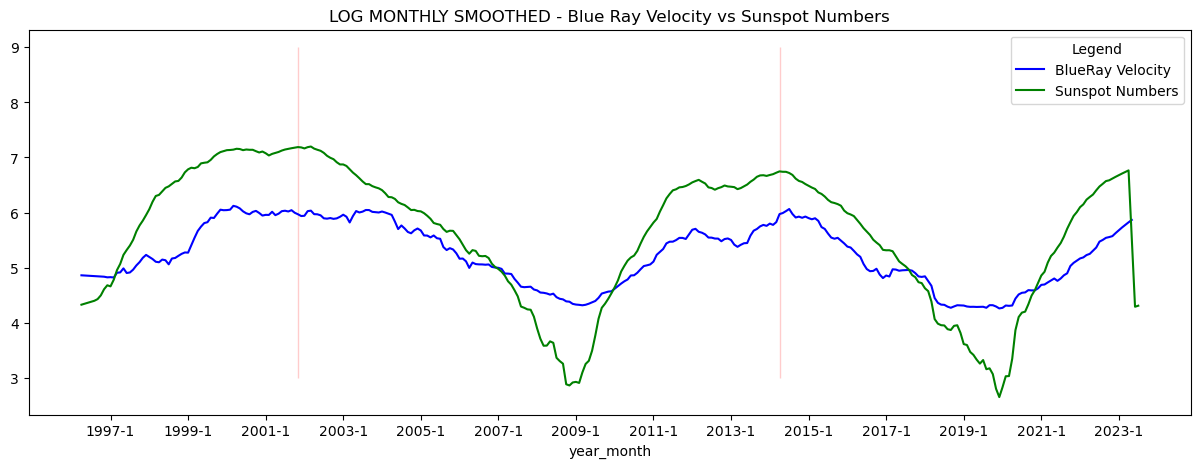

In [141]:
#LOG TRANFORMING THE DATA
import itertools
#Plotting the VIRGO MONTHLY OSCILLATIONS of 23rd and first half of 24th cycle
from matplotlib import pyplot as plt
from scipy import signal

plt.rcParams['figure.figsize'] = [15,5]
#ax=sns.lineplot(x=virgo_month["year_month"],y=virgo_month["Blue Ray"]).set(xticks=range(9,325,24))

#solar maximum for cycle 23 was on 2001-11 and 24th was on 2014-4
#sns.scatterplot(x=[virgo_month.iloc[67]["year_month"]],y=virgo_month.iloc[67]["Blue Ray"],color='red')#23rd cycle max
#sns.scatterplot(x=[virgo_month.iloc[216]["year_month"]],y=virgo_month.iloc[216]["Blue Ray"],color='red')#24th cycle max
#plt.ylim(50,80)
#plt.xlim(0,150) #setting the graph for 23rd cycle (till 2008)


sun_month1=pd.read_csv("sun_month.csv")

sun_month1["year_month"]=sun_month1["Year"].astype(str) +"-"+sun_month1["Month"].astype(str)
sun_month1=sun_month1.iloc[2136:]
sun_month1

#Sunspot Numbers
#sns.lineplot(x=(sun_month1["year_month"]),y=(sun_month1["sunspots"]))

#Smoothed Sunspot Numbers
yhat_1 = signal.savgol_filter(virgo_month["Blue Ray"], 13, 1)
g1=sns.lineplot(x=virgo_month["year_month"],y=np.log(yhat_1),color='blue').set(xticks=range(9,325,24))

#Smoothed Blue Ray Velocity
yhat_ = signal.savgol_filter(sun_month1["sunspots"], 13, 1)
g1=sns.lineplot(x=sun_month1["year_month"],y=np.log(yhat_)+2, color='green')

plt.legend(title='Legend', loc='upper right', labels=['BlueRay Velocity', 'Sunspot Numbers'])
plt.title("LOG MONTHLY SMOOTHED - Blue Ray Velocity vs Sunspot Numbers")

#Boundaries for cycle 24 and 23 MAXIMUMS
sns.lineplot(x=list(itertools.repeat(sun_month1["year_month"].iloc[69], 2)),y=[3,9],color='red')#23RD CYCLE
sns.lineplot(x=list(itertools.repeat(sun_month1["year_month"].iloc[218], 2)),y=[3,9],color='red')#24TH CYCLE


## YEARLY DATA

In [37]:
virgo_year=pd.DataFrame(virgo_month.groupby("Year")["Blue Ray"].mean())

virgo_year.to_csv("virgo_year.csv")
virgo_year=pd.read_csv("virgo_year.csv")
virgo_year[:25] #for 23rd and 2th cycle

,Year,Blue Ray
0,1996,140.135022
1,1997,134.802348
2,1998,171.361104
3,1999,343.480882
4,2000,405.269502
5,2001,426.397627
6,2002,374.775085
7,2003,406.920353
8,2004,300.368617
9,2005,261.504442


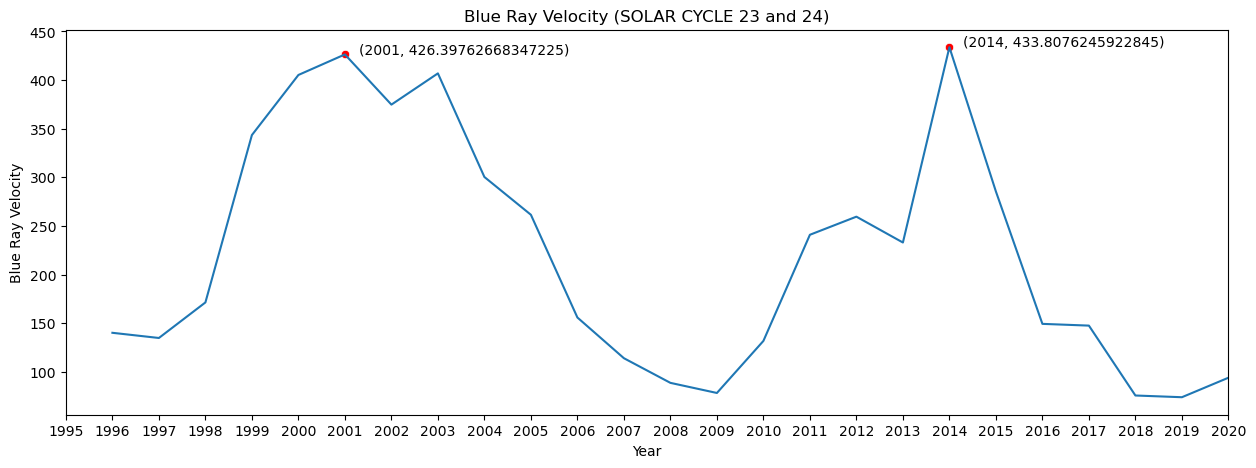

In [139]:
#Plotting the VIRGO YEARLY OSCILLATIONS
from matplotlib import pyplot as plt

#plt.rcParams['figure.figsize'] = [15,5]
sns.lineplot(x=virgo_year["Year"],y=virgo_year["Blue Ray"]).set(xticks=range(1995,2023))

#solar maximum for cycle 23 was on 2001-11
sns.scatterplot(x=[2001],y=virgo_year.iloc[5]["Blue Ray"],color='red')
sns.scatterplot(x=[2014],y=virgo_year.iloc[18]["Blue Ray"],color='red')

plt.xlim(1995,2020)
plt.ylabel("Blue Ray Velocity")
plt.title("Blue Ray Velocity (SOLAR CYCLE 23 and 24)")

for i, j in zip([2001,2014], [virgo_year.iloc[5]["Blue Ray"],virgo_year.iloc[18]["Blue Ray"]]):
   plt.text(i+0.3, j+0.5, '({}, {})'.format(i, j))

C:\Users\SSA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year', ylabel='Blue Ray'>

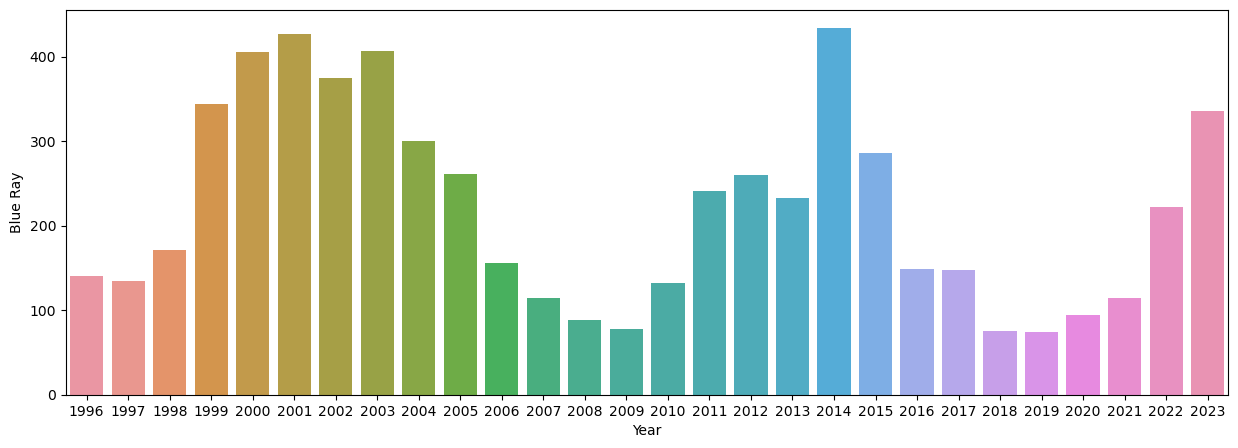

In [39]:
#We get the max oscillation mag in 2001, that is the solar max year of 23rd Cycle
sns.barplot(virgo_year["Year"],virgo_year["Blue Ray"])